In [93]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt
import math

In [94]:
act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))


In [4]:
act_fluxes_dict

{'Name': ['Central Flux', 'Median Background'],
 'ACT-CL J1241.8+1948': [0.00200463419048732, 0.0002500645050576048],
 'ACT-CL J0130.0-0305': [0.007905149289334707, 0.00014674591431226638],
 'ACT-CL J1027.1+0439': [-0.0013835135910642427, 0.0011126907402316468],
 'ACT-CL J1558.8+1534': [0.0013998513539735416, 0.0005153525839129262],
 'ACT-CL J0921.0-0148': [-0.0011092693713137059, 7.231792824692773e-05],
 'ACT-CL J2303.3+0756': [0.022908654416267934, 0.0002777798433970954],
 'ACT-CL J0036.7-2105': [0.0009676140136272596, -0.00042944242244820244],
 'ACT-CL J1547.3+1717': [0.0024144914580290495, 0.00037609529966689255],
 'ACT-CL J0125.7-0633': [0.009170121730489441, 0.00044162182973592673],
 'ACT-CL J1254.3+1228': [0.00012063615436604394, 0.00044534757263870107],
 'ACT-CL J2318.7+1305': [0.005112855504944626, 0.0001097287819960842],
 'ACT-CL J0322.6-0257': [0.0007332767095432349, 0.0007169864115941064],
 'ACT-CL J0527.1-3203': [0.0024850500159882606, 0.0005636819713742527],
 'ACT-CL J125

In [117]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
back_sub_nvss_act_fluxes =np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key][0]
    back_sub_nvss_act_fluxes[i-1] = act_fluxes_dict[key][0] - act_fluxes_dict[key][1]
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
back_sub_nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0]
    back_sub_nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]

cut = -99
nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > cut]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > cut]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

back_sub_nvss_act_fluxes = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes > cut]
back_sub_nvss_mdcw_fluxes = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes > cut]
back_sub_nvss_act_fluxes.sort()
back_sub_nvss_mdcw_fluxes.sort()

0.0015044646247030417


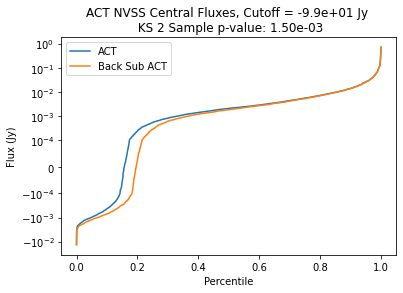

0.006458858912007885 0.006240148893019565
0.00032185447502637706
0.00412665191536846 0.003928758554635534


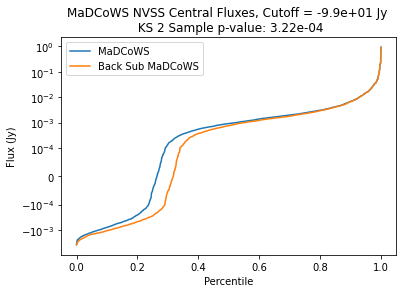

0.9999999999999979


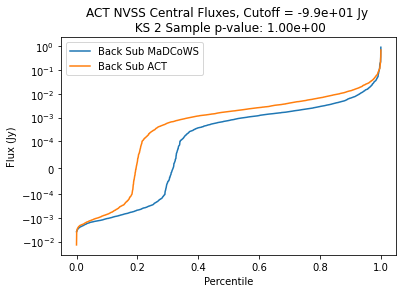

In [119]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))
x2 =  np.arange(len(back_sub_nvss_act_fluxes))
x3 =  np.arange(len(back_sub_nvss_mdcw_fluxes))



plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_act_fluxes, back_sub_nvss_act_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_back_sub.pdf')
plt.show()
print(np.mean(nvss_act_fluxes),np.mean(back_sub_nvss_act_fluxes))


plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, back_sub_nvss_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_mdcw_back_sub.pdf')
print(np.mean(nvss_mdcw_fluxes),np.mean(back_sub_nvss_mdcw_fluxes))
plt.show()
plt.close()

plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
#plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
#plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, nvss_act_fluxes)[1]

plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()



# VLASS KS Test

In [79]:
vlass_act_fluxes = np.loadtxt('actCentralFlux.txt')
vlass_mdcw_fluxes = np.loadtxt('madcowsCentralFlux.txt')


cut = 2.5e-3

vlass_act_fluxes = vlass_act_fluxes[vlass_act_fluxes > cut]
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_act_fluxes.sort()
vlass_mdcw_fluxes.sort()

/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


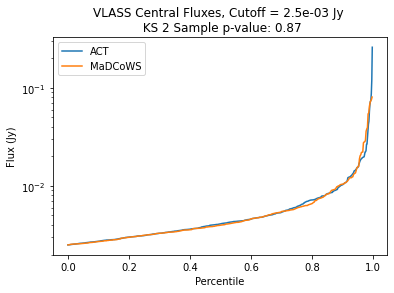

In [80]:
x0 = np.arange(len(vlass_act_fluxes))
x1 = np.arange(len(vlass_mdcw_fluxes))

plt.plot(x0/len(x0), vlass_act_fluxes, label = 'ACT')
plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
p_value = stats.ks_2samp(vlass_act_fluxes, vlass_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2f}'.format(cut, p_value))
plt.yscale('log')

plt.savefig('./plots/KStests/VLASS_{:.2e}.pdf'.format(cut))

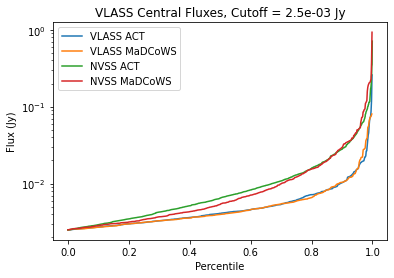

In [75]:
vlass_x0 = np.arange(len(vlass_act_fluxes))
vlass_x1 = np.arange(len(vlass_mdcw_fluxes))

plt.plot(vlass_x0/len(vlass_x0), vlass_act_fluxes, label = 'VLASS ACT')
plt.plot(vlass_x1/len(vlass_x1), vlass_mdcw_fluxes, label = 'VLASS MaDCoWS')

nvss_x0 = np.arange(len(nvss_act_fluxes))
nvss_x1 = np.arange(len(nvss_mdcw_fluxes))

plt.plot(nvss_x0/len(nvss_x0), nvss_act_fluxes, label = 'NVSS ACT')
plt.plot(nvss_x1/len(nvss_x1), nvss_mdcw_fluxes, label = 'NVSS MaDCoWS')



plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('VLASS Central Fluxes, Cutoff = {:.1e} Jy'.format(cut, p_value))
plt.yscale('log')

plt.savefig('./plots/KStests/Both.pdf'.format(p_value))

# Compute spectral indecies

In [241]:
mooFile = open("madcowsCentralFlux.txt",'r')
mooLines = mooFile.readlines()
actFile = open("actCentralFlux.txt",'r')
actLines = actFile.readlines()
vlassmooNameArr = [] # moo names stored here
vlassmooFluxArr = [] # moo fluxes stored here
for line in mooLines:
    vlassmooNameArr.append(line.strip()[2:15])
    vlassmooFluxArr.append(float(line.strip()[18:len(line.strip())-2]))
vlassactNameArr = [] # act names stored here
vlassactFluxArr = [] # act fluxes stored here
for line in actLines:
    
    temp = float(line.strip()[23:len(line.strip())-2])
    if np.isnan(temp):continue
    vlassactFluxArr.append(temp)
    vlassactNameArr.append(line.strip()[2:21])

vlass_act_fluxes_dict = {}
#print(mooLines)
for i, key in enumerate(vlassactNameArr):
    vlass_act_fluxes_dict[key] = vlassactFluxArr[i]
vlass_mdcw_fluxes_dict = {}
for i, key in enumerate(vlassmooNameArr):
    vlass_mdcw_fluxes_dict[key] = vlassmooFluxArr[i]

In [253]:
nvss_act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
nvss_mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))
#nvss_act_fluxes_dict.pop('Name')
#nvss_mdcw_fluxes_dict.pop('Name')

In [254]:

print(len(vlass_mdcw_fluxes_dict))

2199


In [255]:
radio_dict = {}

for key in nvss_mdcw_fluxes_dict.keys():
    const_v = np.log(2.4/1.4)
    vlasskey = key[:-1]
    if float(nvss_mdcw_fluxes_dict[key]) > -1000:
        if vlasskey in vlass_mdcw_fluxes_dict.keys():
            spectral_index = (np.log(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key]))/(const_v))
            #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))
            #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
            flux_90 = float(nvss_mdcw_fluxes_dict[key])*(90/1.4)**spectral_index
            flux_150 = float(nvss_mdcw_fluxes_dict[key])*(150/1.4)**spectral_index
            radio_dict[key] = {'NVSS':nvss_mdcw_fluxes_dict[key], 'VLASS':vlass_mdcw_fluxes_dict[vlasskey], 'nu':spectral_index, '90':flux_90, '150':flux_150}

ValueError: could not convert string to float: 'Central Flux'

In [197]:
print(len(radio_dict))

2086


In [202]:
nus = []
fluxes = []
for key in radio_dict.keys():
    if math.isnan(radio_dict[key]['nu']): continue
    nus.append(radio_dict[key]['nu'])
    fluxes.append(radio_dict[key]['NVSS'])

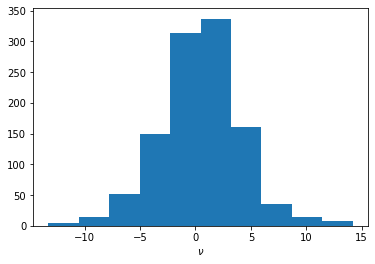

In [203]:
plt.hist(nus)
plt.xlabel(r'$\nu$')
plt.savefig('./plots/2.5radio_nus.pdf')

In [204]:
np.mean(nus)

0.4293178803639875

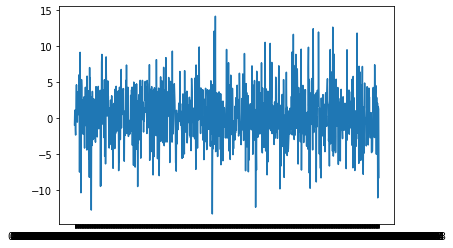

In [205]:
plt.plot(fluxes, nus)
print(np.mean(nus[])

In [209]:
zipped_lists = zip(fluxes, nus)


sorted_zipped_lists = sorted(zipped_lists)
print(sorted_zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

[('-0.00010045965058290677', 9.342303801603004), ('-0.00010149660592343811', 5.227508672857886), ('-0.00011404907074314784', -0.9297979447671896), ('-0.0001151225882088625', 5.4446861381864595), ('-0.00011690936282653993', 7.060891630063547), ('-0.00012749096251602762', 2.1723800904260075), ('-0.00013255350976552722', 5.041101275997833), ('-0.0001365247765038332', 4.39619316266724), ('-0.00013857829095069053', 3.974785631478451), ('-0.0001431843065239943', 5.870708758859971), ('-0.00014783496228338683', 1.636197319182742), ('-0.00015043098723174314', 4.170991587694809), ('-0.00015465581130614985', 5.830837554548109), ('-0.00015484440721977492', 6.630081170189851), ('-0.00015768049979300702', 3.7339682436992008), ('-0.0001640878616092282', 1.2437125774361686), ('-0.00016858372779047983', 2.992933286857028), ('-0.00017459159381320733', 6.876136712508439), ('-0.00017544288716815528', 0.051837140503572667), ('-0.00018344077934550894', 3.8157737820526876), ('-0.00018538519631178024', 1.4259

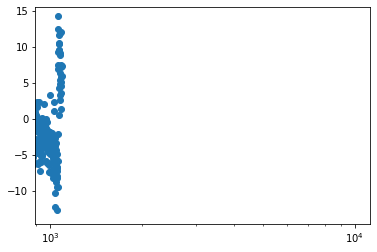

In [226]:
fluxes.sort()
rescale = [1e3*float(flux) for flux in fluxes]
plt.scatter(fluxes, sorted_list1)
plt.xscale('log')
#plt.xticks(np.arange(-1e-4,1e-2, step = 1e-3))

In [229]:
print(np.mean(nvss_mdcw_fluxes))

0.004126651915368459


In [244]:
for i, flux, in enumerate(vlassactFluxArr):
    if np.isnan(flux):
        vlassactFluxArr.pop(i)

In [252]:
print(radio_dict['MOO J1426+0925'])

{'NVSS': '1.660696559664324e-06', 'VLASS': 0.000897082327853127, 'nu': 11.673379144416923, '90': 2123714218429508.2, '150': 8.256968764203715e+17}


In [261]:
print(vlass_mdcw_fluxes_dict['MOO J1426+0925'])

KeyError: 'MOO J1426+0925'

In [259]:
print(nvss_mdcw_fluxes_dict)

{'Name': 'Central Flux', 'MOO J0001+1428': '0.002182741746180065', 'MOO J0001+3644': '0.0013370248036328378', 'MOO J0001+3440': '0.00017623135014882687', 'MOO J0001-2447': '0.0031632511678222177', 'MOO J0001-2533': '0.004346413229683775', 'MOO J0002-0820': '-0.0018204103938041793', 'MOO J0002+1751': '0.00048241617031072017', 'MOO J0003-0903': '0.000496765640988383', 'MOO J0003-2925': '0.0013421659629678474', 'MOO J0003-1341': '0.000779861110763369', 'MOO J0004-0232': '-0.0010783713875855251', 'MOO J0004+0024': '0.001215100340971848', 'MOO J0004+0108': '0.0004066971398175804', 'MOO J0005+1329': '0.004052027740104539', 'MOO J0005+0024': '0.0012391732178457487', 'MOO J0005+1408': '0.0036675280243235863', 'MOO J0005-0443': '0.0018061169730249486', 'MOO J0006+3050': '4.7124208214915556e-05', 'MOO J0006-0244': '-0.00013770842836782442', 'MOO J0006-0751': '6.684585141247786e-05', 'MOO J0007-2108': '0.0005760383442275234', 'MOO J0008-1703': '-0.00036435811832850645', 'MOO J0009-0750': '0.00231

In [91]:
x,y, z = 0.68, 3.4, 0

In [92]:
print('{:.2f}'.format(np.sqrt(x**2+y**2+z**2)))

3.47
